### The Idea of SVM's.

When we are trying to classify linearly seperable data, there tends to be more than one way of seperating the two - some being better than others. SVM's try to find the maximum possible street between the two classes of data. Consider the following example:

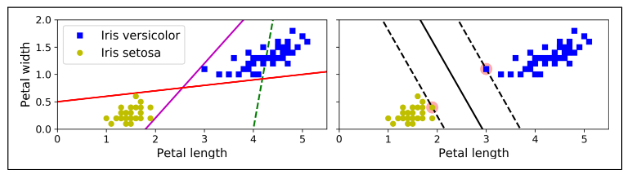 

*Hands on Machine Learning, Oreilley* (Cite this properly)

On the left image, we see clearly why not every seperating hyperplane is built equally. They are far too sensitive. The same goes for the dashed lines on the right - they are too sensitive again. SVM's try find the optimal hyperplane by maximising the distance between *support vectors* - these are the points right on the "edge" of the dataset, closest to the seperating hyperplane. In the image above, they are highlighted in red. This also means that adding datapoints away from the support vectors will not affect the hyperplane.

How sensitive the model is to these support vectors. If we want to classify the data completely, with only one type of point on each side, we call this *hard margin classification*. If we allow margin violations, we call this type of classification *soft margin classification*, see the image below.

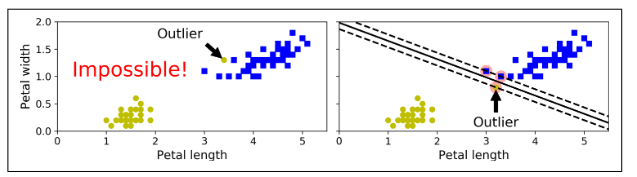

On the left, we are trying for hard margin classification, which is impossible, while on the right we still manage to classify the datasets by allowing margin violations.

### The Linearly Seperable Case

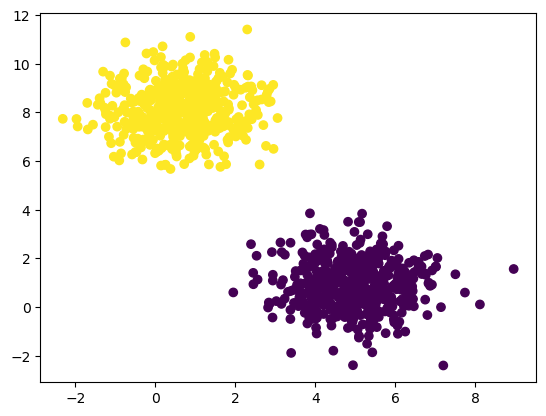

In [2]:
#Creating a linearly seperable dataset with make_blobs

from sklearn.datasets import make_classification, make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples =1000, centers = 2)

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()



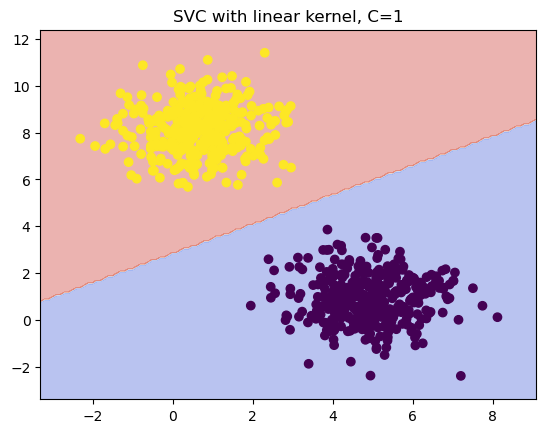

In [3]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#Train-test split - 25% of the data is reserved for testing natively.

X_train, X_test, y_train, y_test = train_test_split(X,y)

#Training our linear SVM model - one more sensitive to outliers, one less so.

svc = svm.SVC(kernel='linear').fit(X_train,y_train)
less_sensitive_svc = svm.SVC(kernel='rbf', C=1, gamma=0.7).fit(X_train, y_train)
#Plotting our test data and the maximal seperating hyperplane.

titles = ['SVC with linear kernel, C=1', 'SVC with RBF kernel']
xx, yy = np.meshgrid(np.arange(X_train[:,0].min()-1, X_train[:,0].max()+1, 0.1), np.arange(X_train[:,1].min()-1, X_train[:,1].max()+1, 0.1))

Z=svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_train[:,0], X_train[:,1],c = y_train, marker='o')
plt.title(titles[0])
plt.show()

#This has done literally nothing - gives good code for showing how other kernels work.

<Axes: >

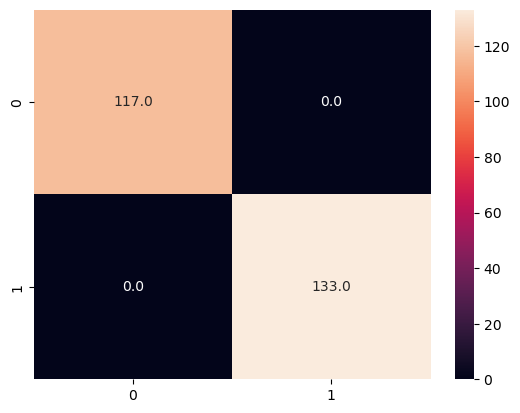

In [4]:
#The confusion matrix.

from sklearn import metrics
import seaborn as sns
y_pred = svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f")

#As we can see, all points are classified properly. Of course, this is an easy dataset.

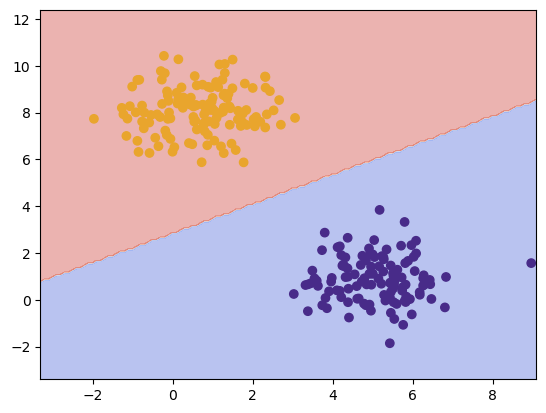

In [5]:
#Plot of the test set - we can see the 7 yellow points that are being misclassified.
#But in general, SVC is working well for the linearly seperable data.

xx, yy = np.meshgrid(np.arange(X_train[:,0].min()-1, X_train[:,0].max()+1, 0.1), np.arange(X_train[:,1].min()-1, X_train[:,1].max()+1, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_test[:,0], X_test[:,1],c = y_test, marker='o')
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()

In [6]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



### Non-linearly Seperable data. 

We will look at a few types of classification problems here. First of all, at a binary classification with nonlinear data, and we will see how SVM's deal with that. Then we will look at multilabel classification, in easier and harder cases, and see how SVM's deal. 

First of all, binary classification with non-linearly seperable data. 

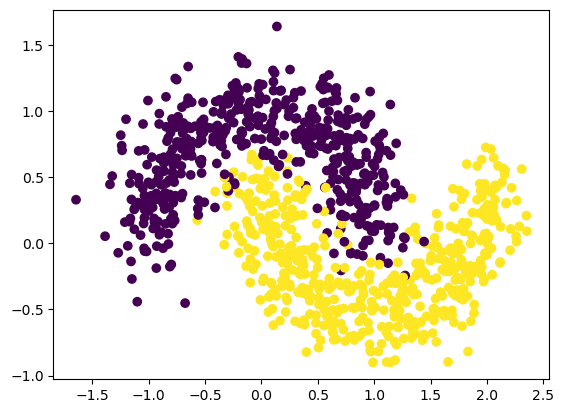

In [7]:
from sklearn.datasets import make_moons
#Creating a binary classification problem with non-linearly seperable data

X1, y1 = make_moons(1000, noise=0.2)

plt.scatter(X1[:,0], X1[:,1], c=y1)
plt.show()

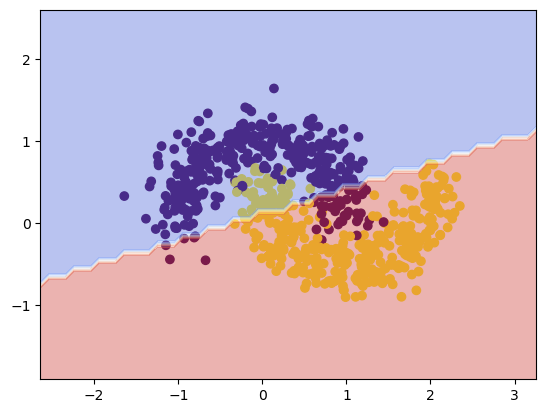

In [8]:
#How does linear SVC fare? 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
svm1 = svm.SVC(kernel='linear').fit(X1_train,y1_train)

xx, yy = np.meshgrid(np.arange(X1_train[:,0].min()-1, X1_train[:,0].max()+1, 0.1), np.arange(X1_train[:,1].min()-1, X1_train[:,1].max()+1, 0.1))
Z = svm1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X1_train[:,0], X1_train[:,1],c = y1_train, marker='o')
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()

#Linear SVM fares very poorly - as is to be expected, as it is trying to classify it linearly.

### The Kernel Trick

A way to classify non-linear data is to add features. Consider the diagram below.

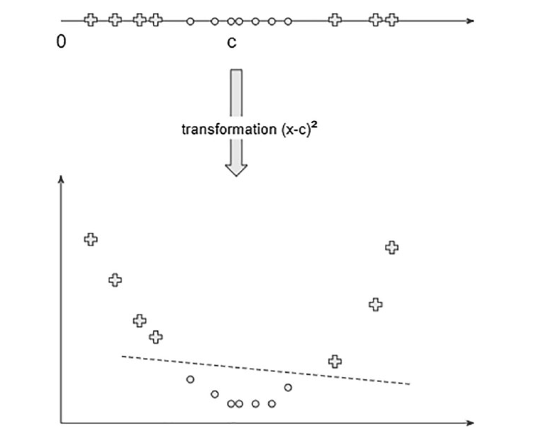
[2]

The one dimensional datset is not linearly seperable. (No one point - 0D plane) will seperate it. However, the data in 2D is linearly seperable. This is what we are doing when we change the kernel of the SVM, we are adding features.

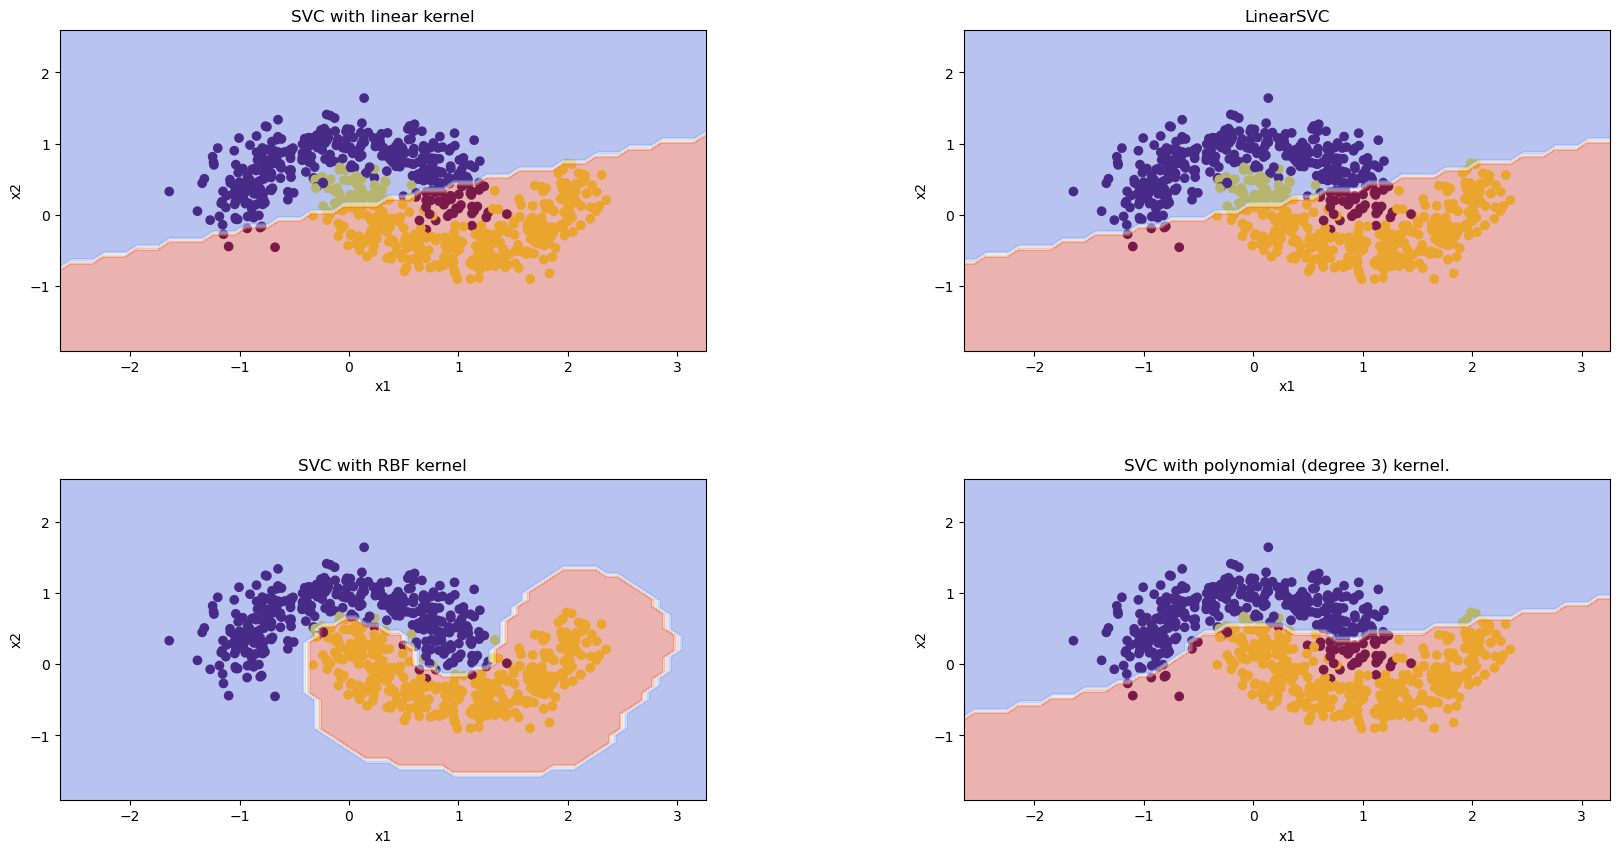

In [14]:
rbf_svc = svm.SVC(kernel='rbf', gamma=5, C=1).fit(X1_train, y1_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=5).fit(X1_train, y1_train)
lin_svc = svm.LinearSVC(C=1).fit(X1_train, y1_train)

titles1 = ['SVC with linear kernel', 'LinearSVC', 'SVC with RBF kernel', 'SVC with polynomial (degree 3) kernel.']

xx, yy = np.meshgrid(np.arange(X1_train[:,0].min()-1, X1_train[:,0].max()+1, 0.1), np.arange(X1_train[:,1].min()-1, X1_train[:,1].max()+1, 0.1))

plt.figure(figsize=(20,10))
for i, clf in enumerate((svm1, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.scatter(X1_train[:,0], X1_train[:,1],c = y1_train, marker='o')
    plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(titles1[i])

plt.show()

<Axes: >

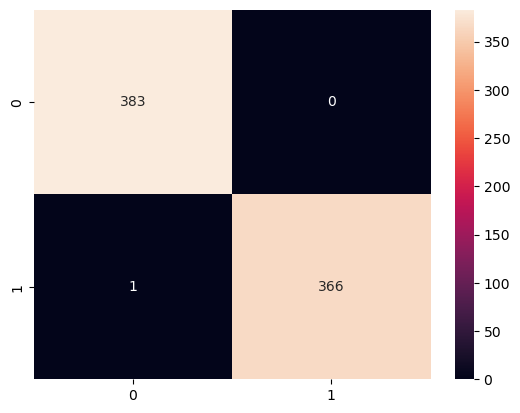

In [13]:
#Use this section to show how well different kernels do. 

from sklearn.calibration import cross_val_predict

y_train_pred = cross_val_predict(rbf_svc, X_train, y_train, cv=3)
cm1 = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm1, annot=True, fmt='.0f')

### Multilabel Classification

A benefit of SVM's is that they natively support multilabel classification. We can see this with the iris dataset.

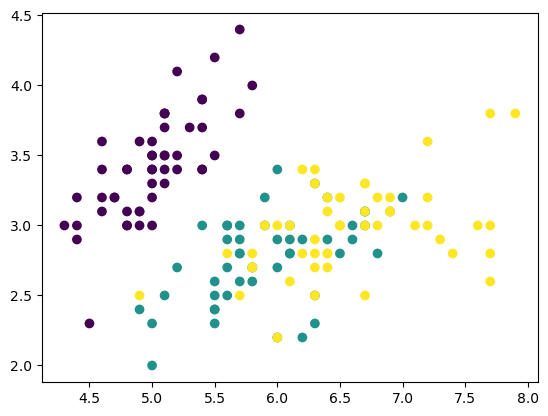

In [46]:

from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['target'] = iris.target
X2 = df.iloc[:,:2].to_numpy()
y2=df.iloc[:,5].to_numpy()

plt.scatter(X2[:,0],X2[:,1],c=y2)
plt.show()

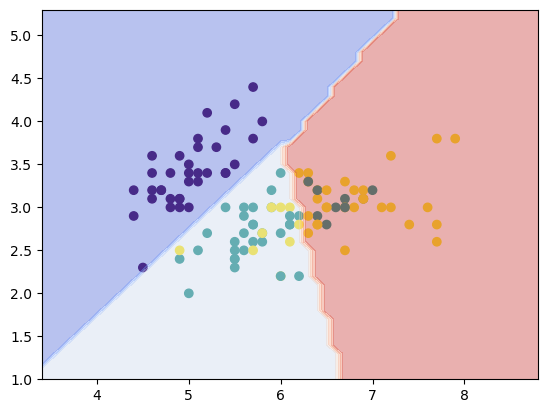

In [67]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)
lin_svc = svm.SVC(kernel='linear',gamma=1,C=1).fit(X2_train,y2_train)


xx, yy = np.meshgrid(np.arange(X2_train[:,0].min()-1, X2_train[:,0].max()+1, 0.1), np.arange(X2_train[:,1].min()-1, X2_train[:,1].max()+1, 0.1))
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X2_train[:,0], X2_train[:,1],c = y2_train, marker='o')
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()

In [ ]:
#Hyperparameter tuning.

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','linear','poly']}
base_estimator = svm.SVC()
grid_search_cv = GridSearchCV(base_estimator, param_grid, verbose=1, cv=3)
grid_search_cv.fit(X2_train, y2_train)

print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
SVC(C=1, gamma=1, kernel='linear')


<Axes: >

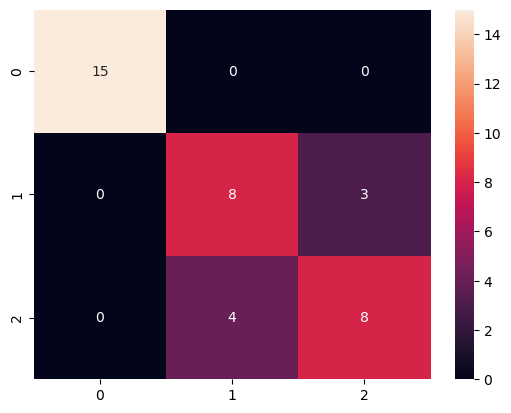

In [69]:

y2_train_pred = lin_svc.predict(X2_test)
y2_cm = metrics.confusion_matrix(y2_test, y2_train_pred)
sns.heatmap(y2_cm, annot=True, fmt='.0f')

### Support Vector Regression

The way to use SVMs for regression, linear or nonlinear, is to reverse the objective. Instead of trying to fit the maximum hyperplane between two classes while limiting margin violations, SVM regression tries to ft as many instances as possible on the street while limiting margin violations - the width of the street is controlled by a hyperparameter, $\varepsilon$.

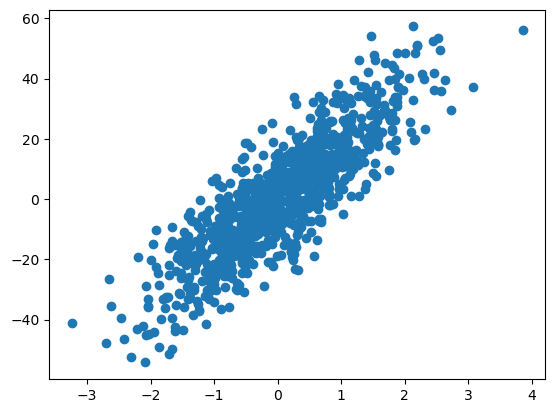

In [101]:
#Generate data for regression. 
from sklearn.datasets import make_regression
X3, y3, true_weights = make_regression(n_samples=1000, n_features =1, n_informative=1, noise=10, coef=True, random_state=42)
plt.scatter(X3, y3)


Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


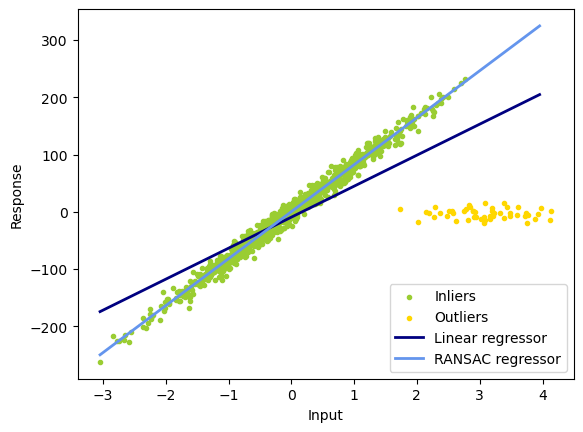

In [94]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model

n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(
    X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
)
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
)
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regressor",
)
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()
